#Quantum QR Code Generator With Encoded Message

Installing reqd libraries

In [ ]:
pip install qiskit[all] qiskit-aer matplotlib qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 34.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f70ddbf0cdf9b4df1b0161cfec02779962

importing libraries

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qrcode

user input

In [ ]:
msg=input("Enter the message to encode: ")

Enter the message to encode: Fuck off


remove duplicates using set and rejoin string after sorting

In [ ]:
message = ''.join(sorted(set(msg), key=msg.index))
# print(message)

convert to binary by concatenating all ascii codes


In [ ]:
msg_bin = ''.join(format(ord(i), '08b') for i in message)
# print(msg_bin)

create quantum register of size len(msg_bin)+1 and classical register of size len(msg_bin), and create quantum circuit with these


In [ ]:
q=QuantumRegister(len(msg_bin)+1)
c=ClassicalRegister(len(msg_bin))
qc=QuantumCircuit(q,c)

flip last qubit(ancilla) state and apply hadamard to all qubits in qc

In [ ]:
qc.x(q[-1])
qc.h(q)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=57, num_clbits=0, params=[]), qubits=(<Qubit register=(57, "q0"), index=0>, <Qubit register=(57, "q0"), index=1>, <Qubit register=(57, "q0"), index=2>, <Qubit register=(57, "q0"), index=3>, <Qubit register=(57, "q0"), index=4>, <Qubit register=(57, "q0"), index=5>, <Qubit register=(57, "q0"), index=6>, <Qubit register=(57, "q0"), index=7>, <Qubit register=(57, "q0"), index=8>, <Qubit register=(57, "q0"), index=9>, <Qubit register=(57, "q0"), index=10>, <Qubit register=(57, "q0"), index=11>, <Qubit register=(57, "q0"), index=12>, <Qubit register=(57, "q0"), index=13>, <Qubit register=(57, "q0"), index=14>, <Qubit register=(57, "q0"), index=15>, <Qubit register=(57, "q0"), index=16>, <Qubit register=(57, "q0"), index=17>, <Qubit register=(57, "q0"), index=18>, <Qubit register=(57, "q0"), index=19>, <Qubit register=(57, "q0"), index=20>, <Qubit register=(57, "q0"), index=21>, <Qubit register=(57, "q0"), index=22>, <Qubit 

**Oracle**
1. secret binary string used to mark state to be found, here complementary of msg_bin
2. apply cx to last qubit(ancilla) wrt all qubits that correspond to 1 in secret string

In [ ]:
def oracle(msg_bin,qc):
  secret=''
  for i in msg_bin:
    if i=='0':
      secret+='1'
    else:
      secret+='0'
  for i in range(len(secret)):
    if secret[i]=='1':
      qc.cx(q[i],q[-1])
  qc.barrier()
  return qc

apply oracle to qc

In [ ]:
qc=oracle(msg_bin,qc)

again apply hadamard to all qubits in qc (except ancilla) and then measure them

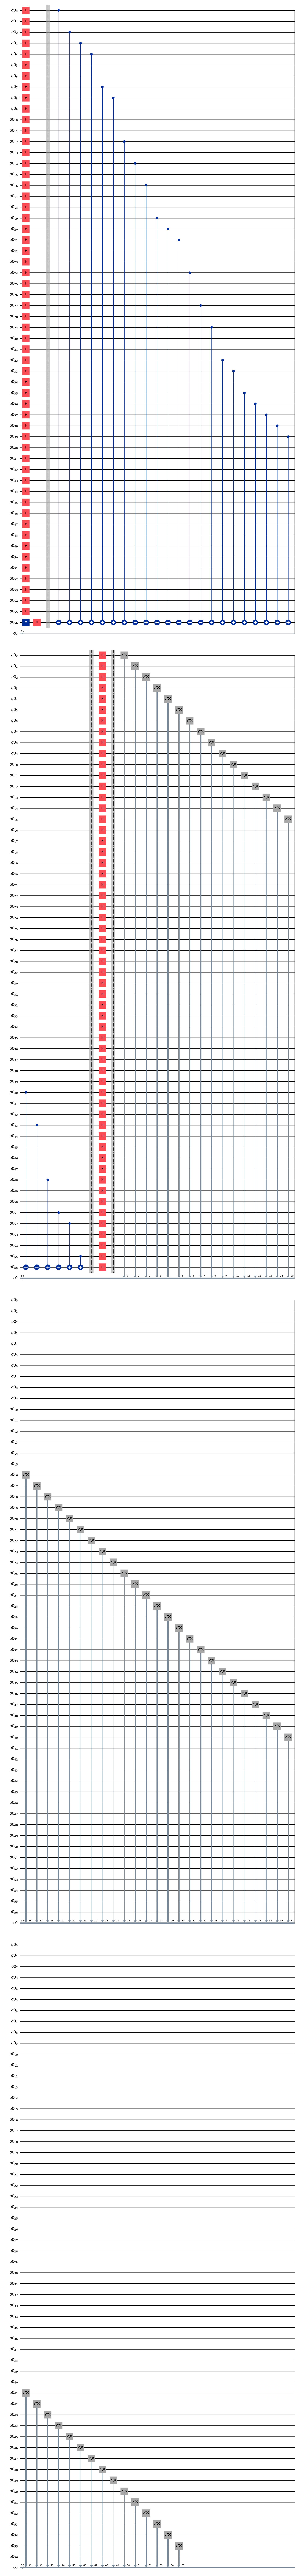

In [ ]:
qc.h(q)
qc.barrier()
qc.measure(q[:-1],c)
qc.draw('mpl')

get counts and measurement using aer simulator

In [ ]:
simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
print(counts)
mode_key=max(counts, key=counts.get)
measurement=mode_key[::-1]
# print(measurement)

{'10011001000010011111101100101001001110010101000110011101': 1024}


generate qr code

In [ ]:
qr=qrcode.QRCode(version=None, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=2)
qr.add_data(msg)
qr.make(fit=True)
img=qr.make_image(fill_color="black", back_color="white")
img.save("qr.png")

secret code and measurement

In [ ]:
print("Secret code: ",msg_bin)
print("Measurement: ",measurement)

Secret code:  01000110011101010110001101101011001000000110111101100110
Measurement:  10111001100010101001110010010100110111111001000010011001


Histogram

/usr/local/lib/python3.11/dist-packages/qiskit/visualization/counts_visualization.py:412: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


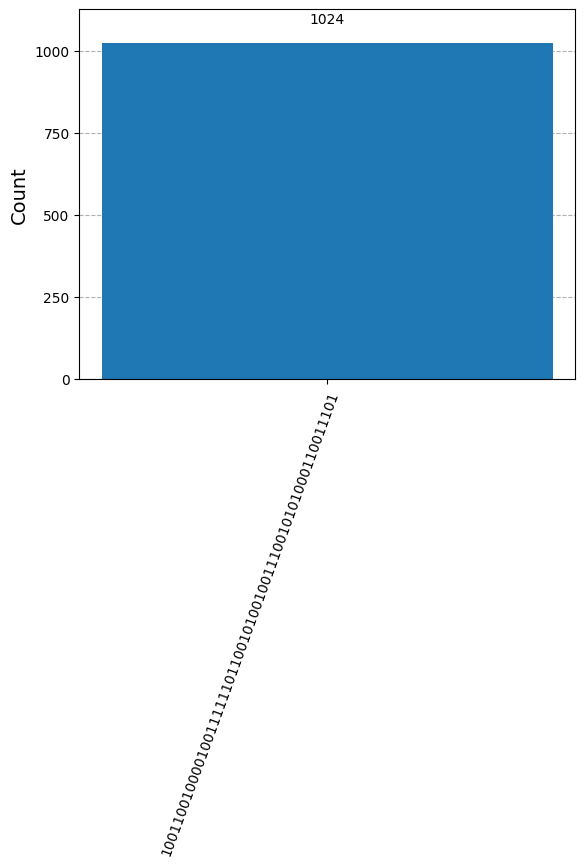

In [ ]:
plot_histogram(counts)